<a href="https://colab.research.google.com/github/payalmundra/Aerofit-Customer-Segmentation/blob/main/Aerofit_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Market Segmentation: Optimizing Sales Strategy via Predictive Modeling**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import shapiro, levene, kruskal, mannwhitneyu,f_oneway

# **Business Problem**

AeroFit wants to identify which customer characteristics influence the purchase of each treadmill model (KP281, KP481, KP781). By analyzing demographic and behavioral factors, the goal is to build customer profiles, understand segment-wise buying patterns, and improve product recommendations and marketing strategies.

In [2]:
df = pd.read_csv("/content/aerofit_treadmill.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

The dataframe consists of 180 records and 9 features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


The dataset does not contain any missing values across any of its columns.

In [7]:
df.duplicated().sum()

np.int64(0)

The dataframe has no duplicated observations

In [8]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
print(df.Product.value_counts())
print('-'*50)
print(df.MaritalStatus.value_counts())
print('-'*50)
print (df.Gender.value_counts())

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
--------------------------------------------------
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      104
Female     76
Name: count, dtype: int64


**Analysis of Outliers using boxplot**

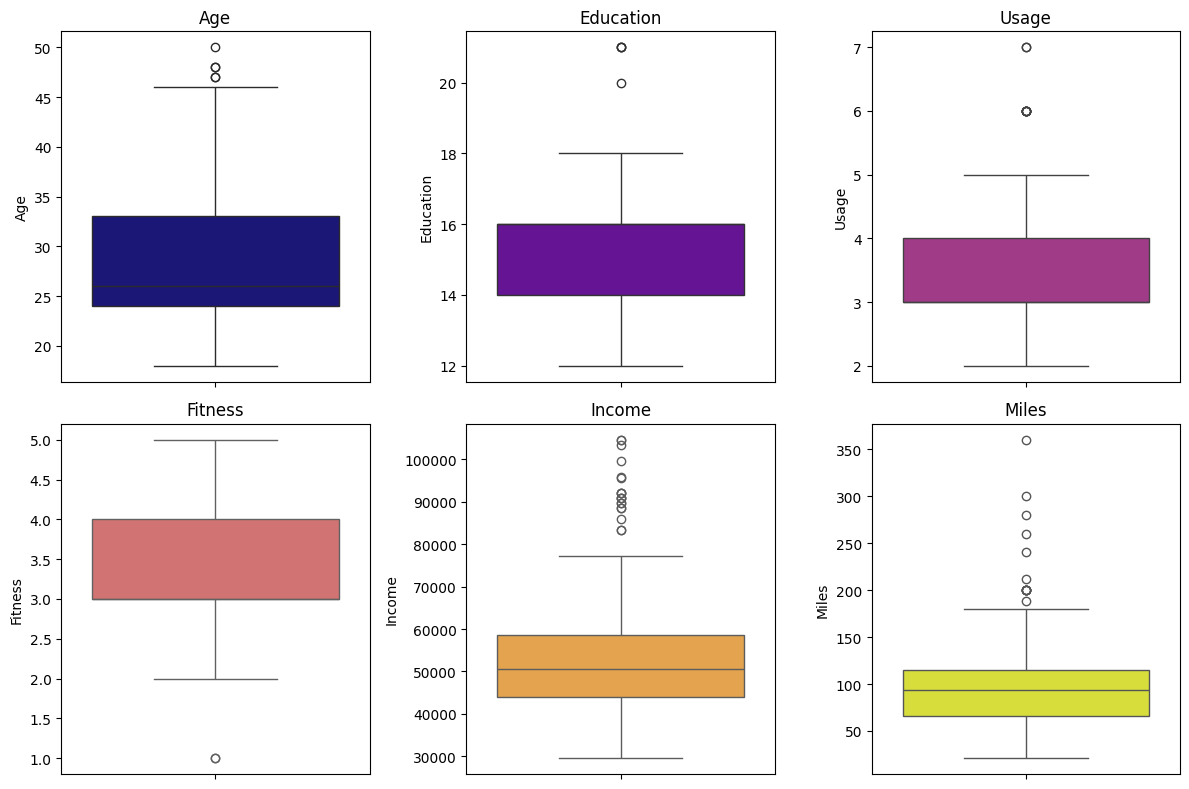

In [12]:
numeric_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

plt.figure(figsize=(12, 8))

# Get colors from plasma colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 3 rows, 2 columns layout
    sns.boxplot(y=df[col],color=colors[i-1])
    plt.title(f"{col}")
    plt.tight_layout()

plt.show()




*   **Age:** Most customers are young adults, with ~75% aged 33 or younger. A few older outliers (around 45–50) exist, representing a potential niche segment such as dedicated runners or professionals that could be targeted separately from the core 20s–30s group.
*  **Education:**  Nearly 75% of customers have 16 years of education or less, indicating most are college graduates or below. The tight spread and very few outliers (around 2%) suggest education level is not a major differentiator among buyers.
*   **Usage:** Concentrated around 2–4 times per week, with few extreme values. Most customers exhibit moderate treadmill usage, while very high usage “power users” are rare.
*   **Fitness Rating:** Self-assessed fitness scores range from 1 to 5, but most cluster at 3, showing that the majority perceive themselves as moderately fit. The low variability indicates that fitness alone may not effectively segment customers.
*   **Income:** Highly variable, with roughly 50% earning $29K–$50K and a long tail extending to ~$100K. Around 10% are high-income outliers, indicating a small segment of premium buyers.
*   **Miles per Week:** Most customers run/walk 50–100 miles per week, but a small segment of high-mileage users exists. This suggests a split between casual exercisers and very active users.

Note : Outliers were identified but not removed, as they represent genuine customer behavior and are important for business interpretation.






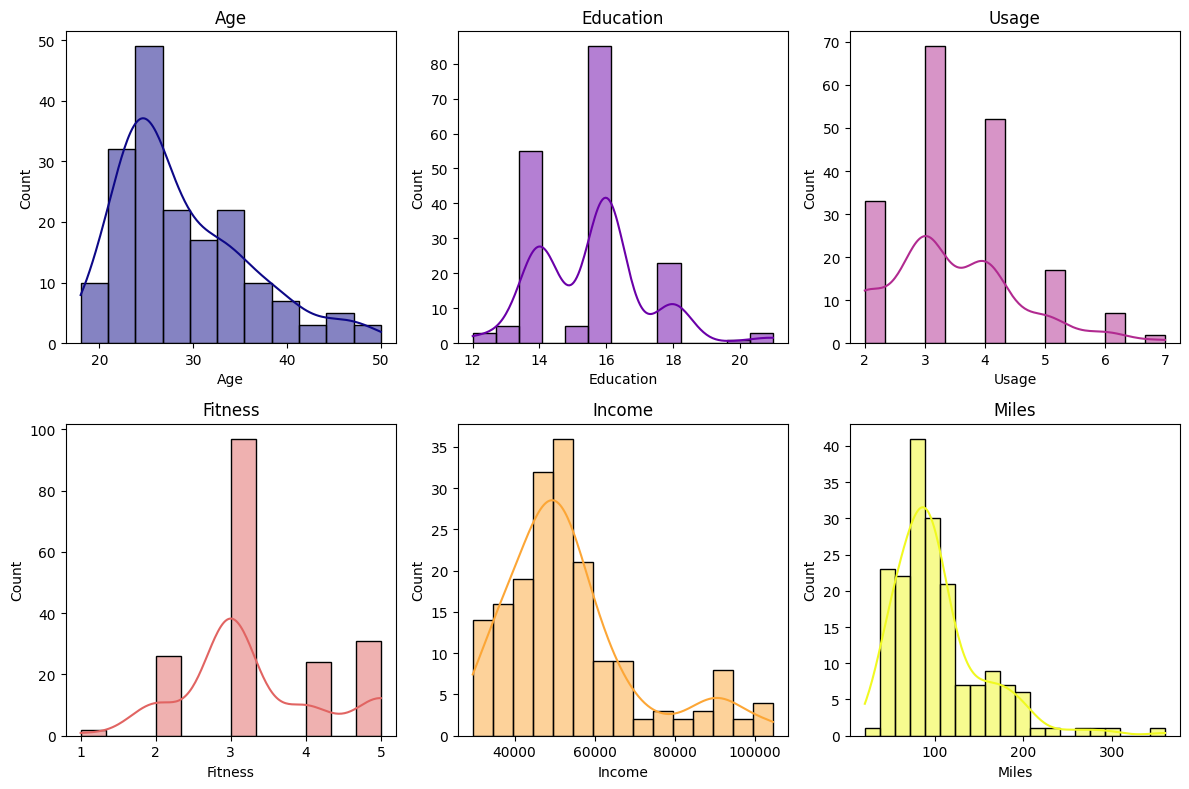

In [13]:
numeric_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

plt.figure(figsize=(12, 8))

# Get colors from plasma colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.histplot(x=df[col], kde=True, color=colors[i-1])
    plt.title(f"{col}")
    plt.tight_layout()

plt.show()



*  **Age Distribution:** Most buyers are between 25-30 years, indicating a young adult demographic.

*  **Education Level:** Concentrated around 14 and 16 years, showing that mid-level educated users dominate.

*  **Usage Frequency:** Peaks at 3 times per week, then gradually declines, suggesting moderate usage is most common.

*  **Fitness Rating:** The majority rate themselves as 3, while very few rate themselves at 1.

* **Income Distribution:** Primarily between 40,000-60,000, with a smaller secondary peak around 90,000, representing mid- to high-income buyers.

* **Miles Covered:** Mostly ranges from 50-150 miles per week, reflecting typical treadmill activity levels.

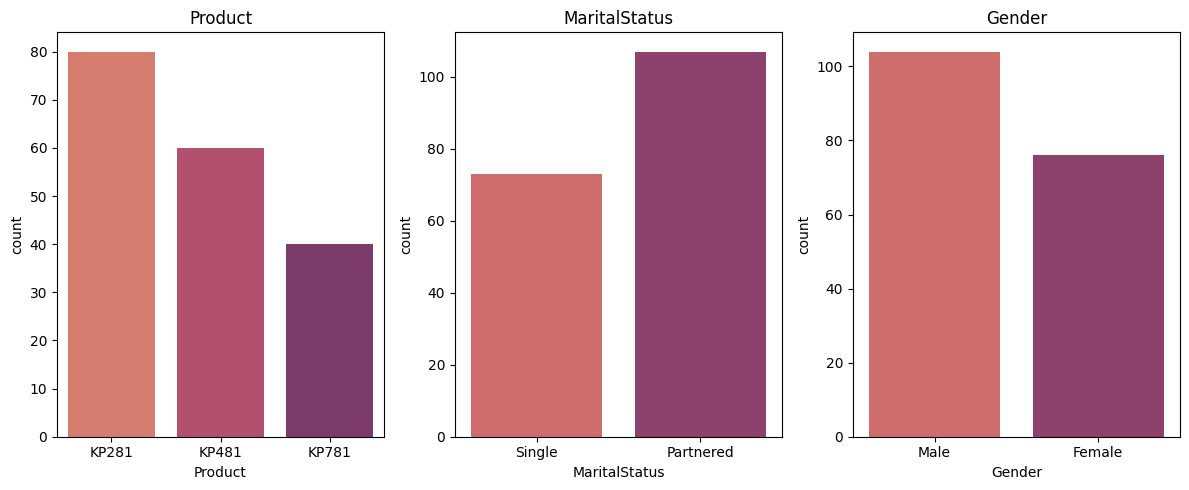

In [14]:
cat_cols=['Product','MaritalStatus','Gender']
plt.figure(figsize=(12, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette='flare', legend=False)
    plt.title(f"{col}")
    plt.tight_layout()

plt.show()



*   **Product Preference:** KP281 is the most purchased treadmill, whereas KP781 is the least popular.
*   **Marital Status:** Comparatively, married individuals use treadmills more frequently than single users.
*   **Gender Distribution:** Male users outnumber female users among treadmill buyers.






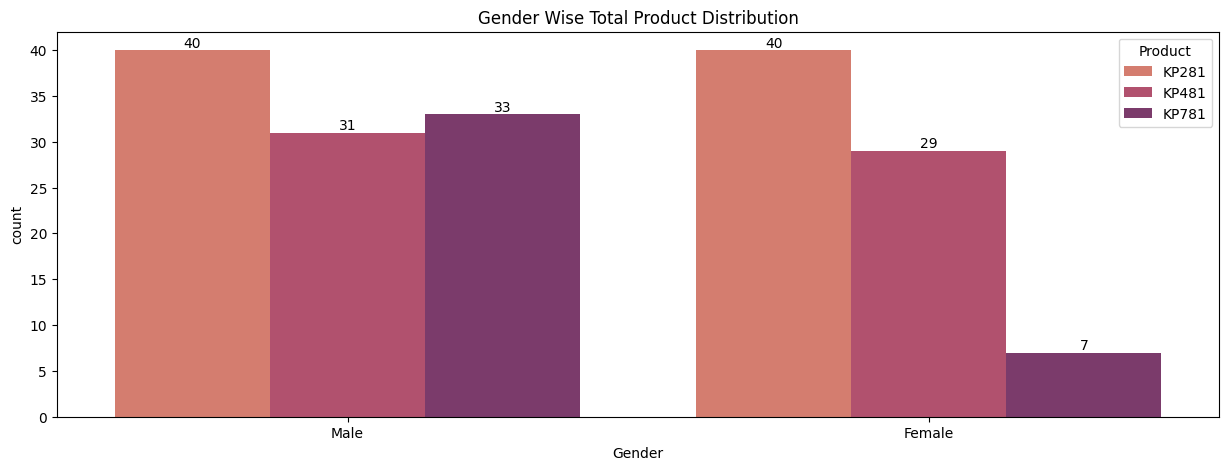

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Gender', hue='Product', data=df,palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Gender Wise Total Product Distribution')
plt.show()

Male customers tend to purchase the KP781 treadmill more frequently than female customers. In contrast, the KP281 and KP481 models show a nearly balanced distribution between male and female buyers.

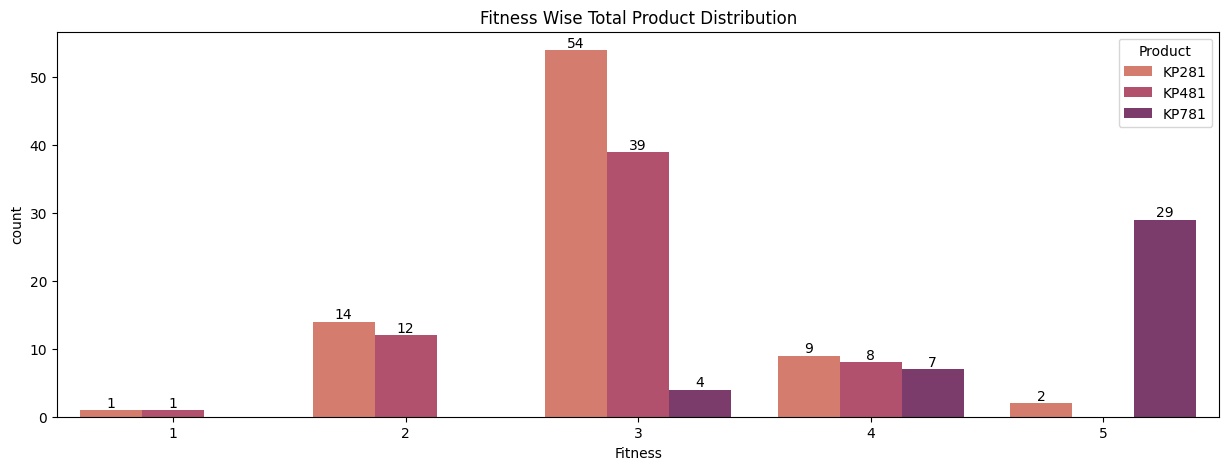

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Fitness', hue='Product', data=df,palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Fitness Wise Total Product Distribution')
plt.show()

Most customers rate their fitness level as 3. Those who purchase the KP781 treadmill generally consider themselves fitter than buyers of the KP281 and KP481 models. In contrast, individuals who rate their fitness as 2 or below tend not to prefer the KP781 treadmill.

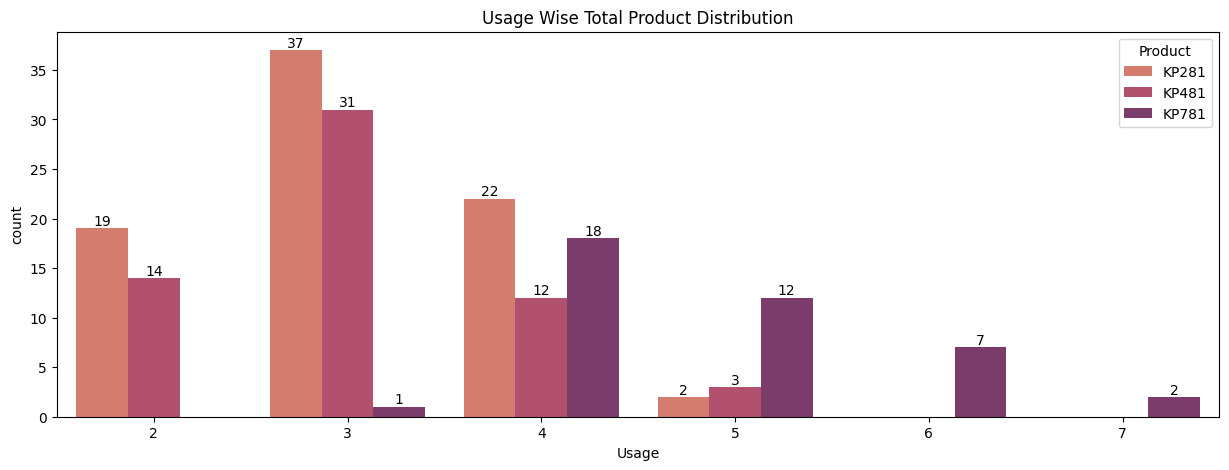

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Usage', hue='Product', data=df,palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Usage Wise Total Product Distribution')
plt.show()

The majority of customers report using the treadmill 3 times per week, with only a small minority reaching 6–7 weekly sessions.
In contrast, KP781 buyers demonstrate higher engagement, commonly using the treadmill 4–5 times per week, indicating a more active and fitness-oriented segment.


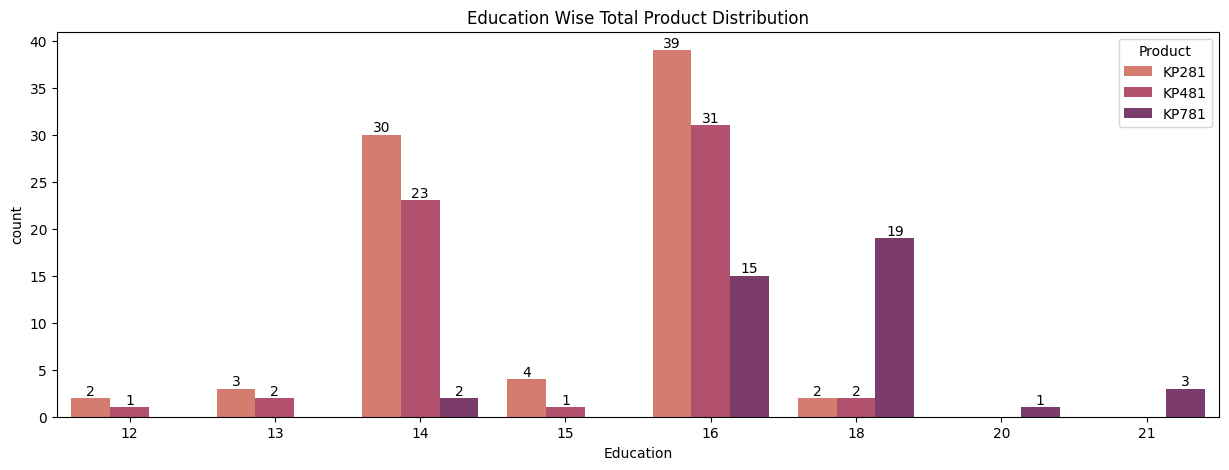

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Education', hue='Product', data=df,palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Education Wise Total Product Distribution')
plt.show()

Customers who purchase the KP781 treadmill typically have 16–18 years of education, reflecting a more academically advanced group. In contrast, KP281 buyers usually fall within the 14–16 years range, with 16 years being the upper limit for most users. This indicates that KP281 customers are primarily college graduates.

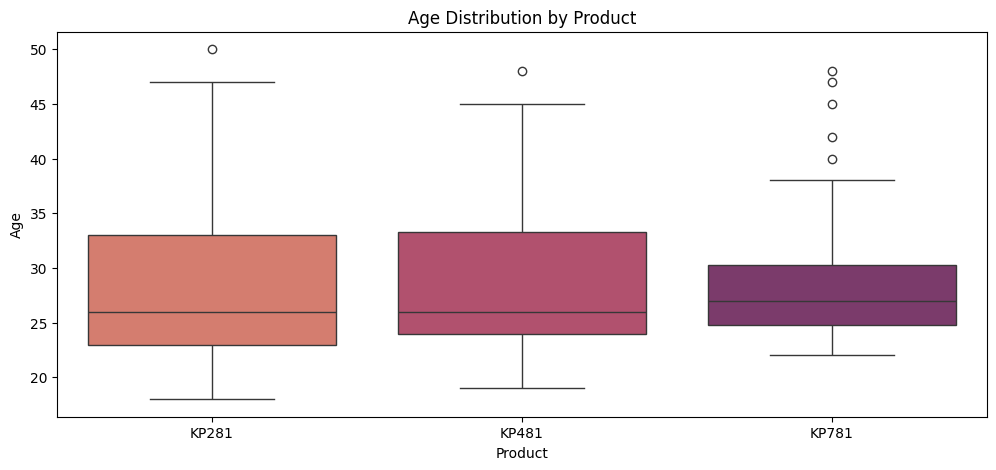

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Product', y='Age', data=df, palette='flare',hue='Product')
plt.title('Age Distribution by Product')
plt.show()

Customers in the 24–33 age group purchase the highest number of treadmills. Notably, around 75% of KP781 users fall within the 25–30 age range.

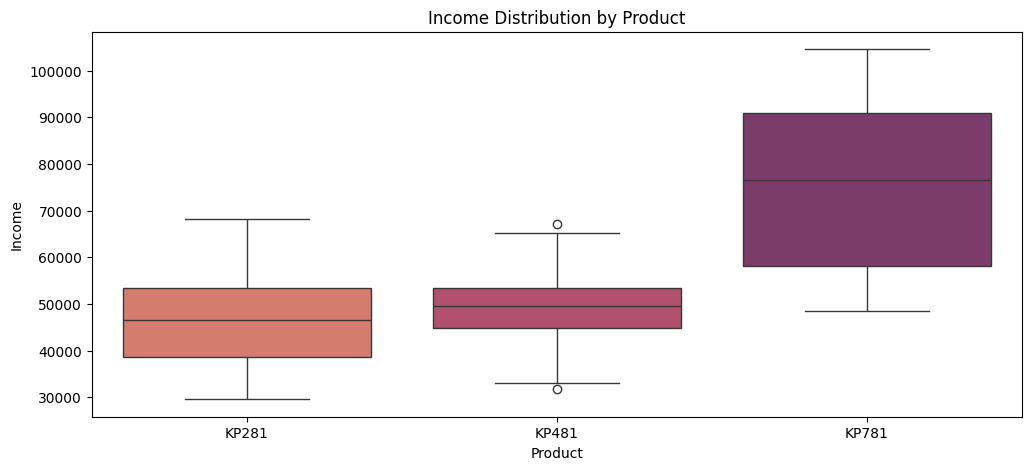

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Product', y='Income', data=df, palette='flare',hue='Product')
plt.title('Income Distribution by Product')
plt.show()

The premium KP781 treadmill, priced at $2,500 and equipped with advanced features, is favored by customers earning more than 45,000. In comparison, the KP281 is typically chosen by individuals with incomes between 30,000 and 50,000, with the KP481 being the next preferred option.

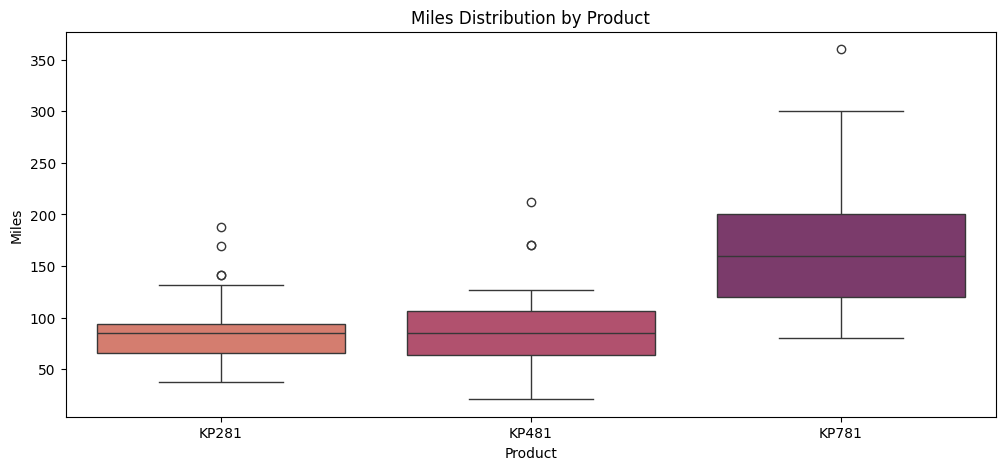

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Product', y='Miles', data=df, palette='flare',hue='Product')
plt.title('Miles Distribution by Product')
plt.show()

Customers who purchase the KP781 treadmill tend to walk or run over 80 miles per week, with a median of around 160 miles, indicating very high engagement.
In contrast, KP281 buyers typically record 66–94 miles per week, with a maximum of about 188 miles, reflecting more moderate weekly mileage.

In [22]:
df_copy=df.copy()
df_copy['Product'] = df_copy['Product'].map({'KP281': 0, 'KP481': 1, 'KP781': 2})
df_copy['Gender'] = df_copy['Gender'].map({'Female': 1, 'Male': 0})
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].map({'Single': 0, 'Partnered': 1})


In [23]:
df_copy.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,0,14,0,3,4,29562,112
1,0,19,0,15,0,2,3,31836,75
2,0,19,1,14,1,4,3,30699,66
3,0,19,0,12,0,3,3,32973,85
4,0,20,0,13,1,4,2,35247,47


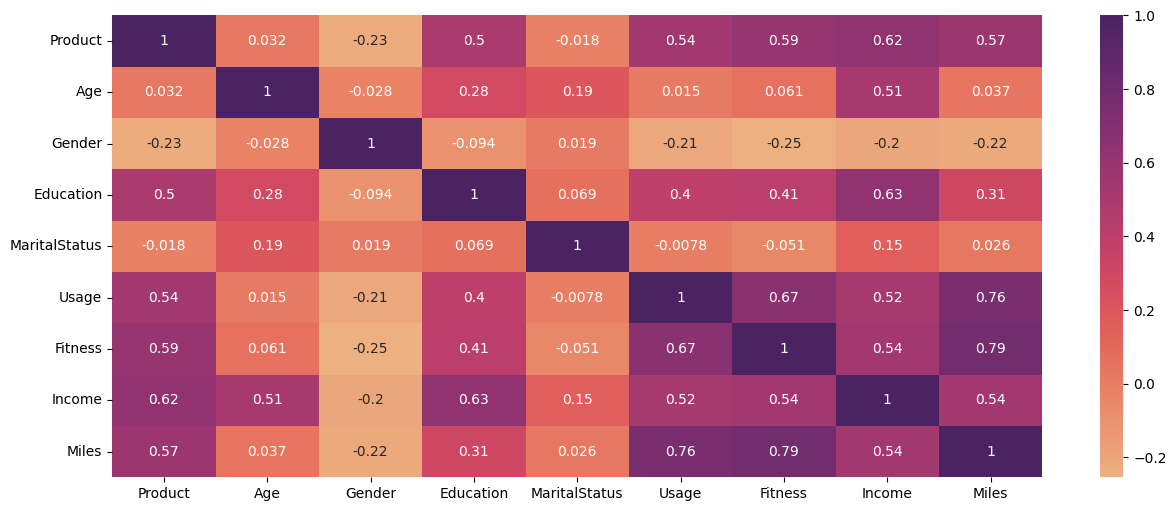

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.select_dtypes(include='number').corr(), cmap='flare', annot=True)
plt.show()


<Figure size 1500x1000 with 0 Axes>

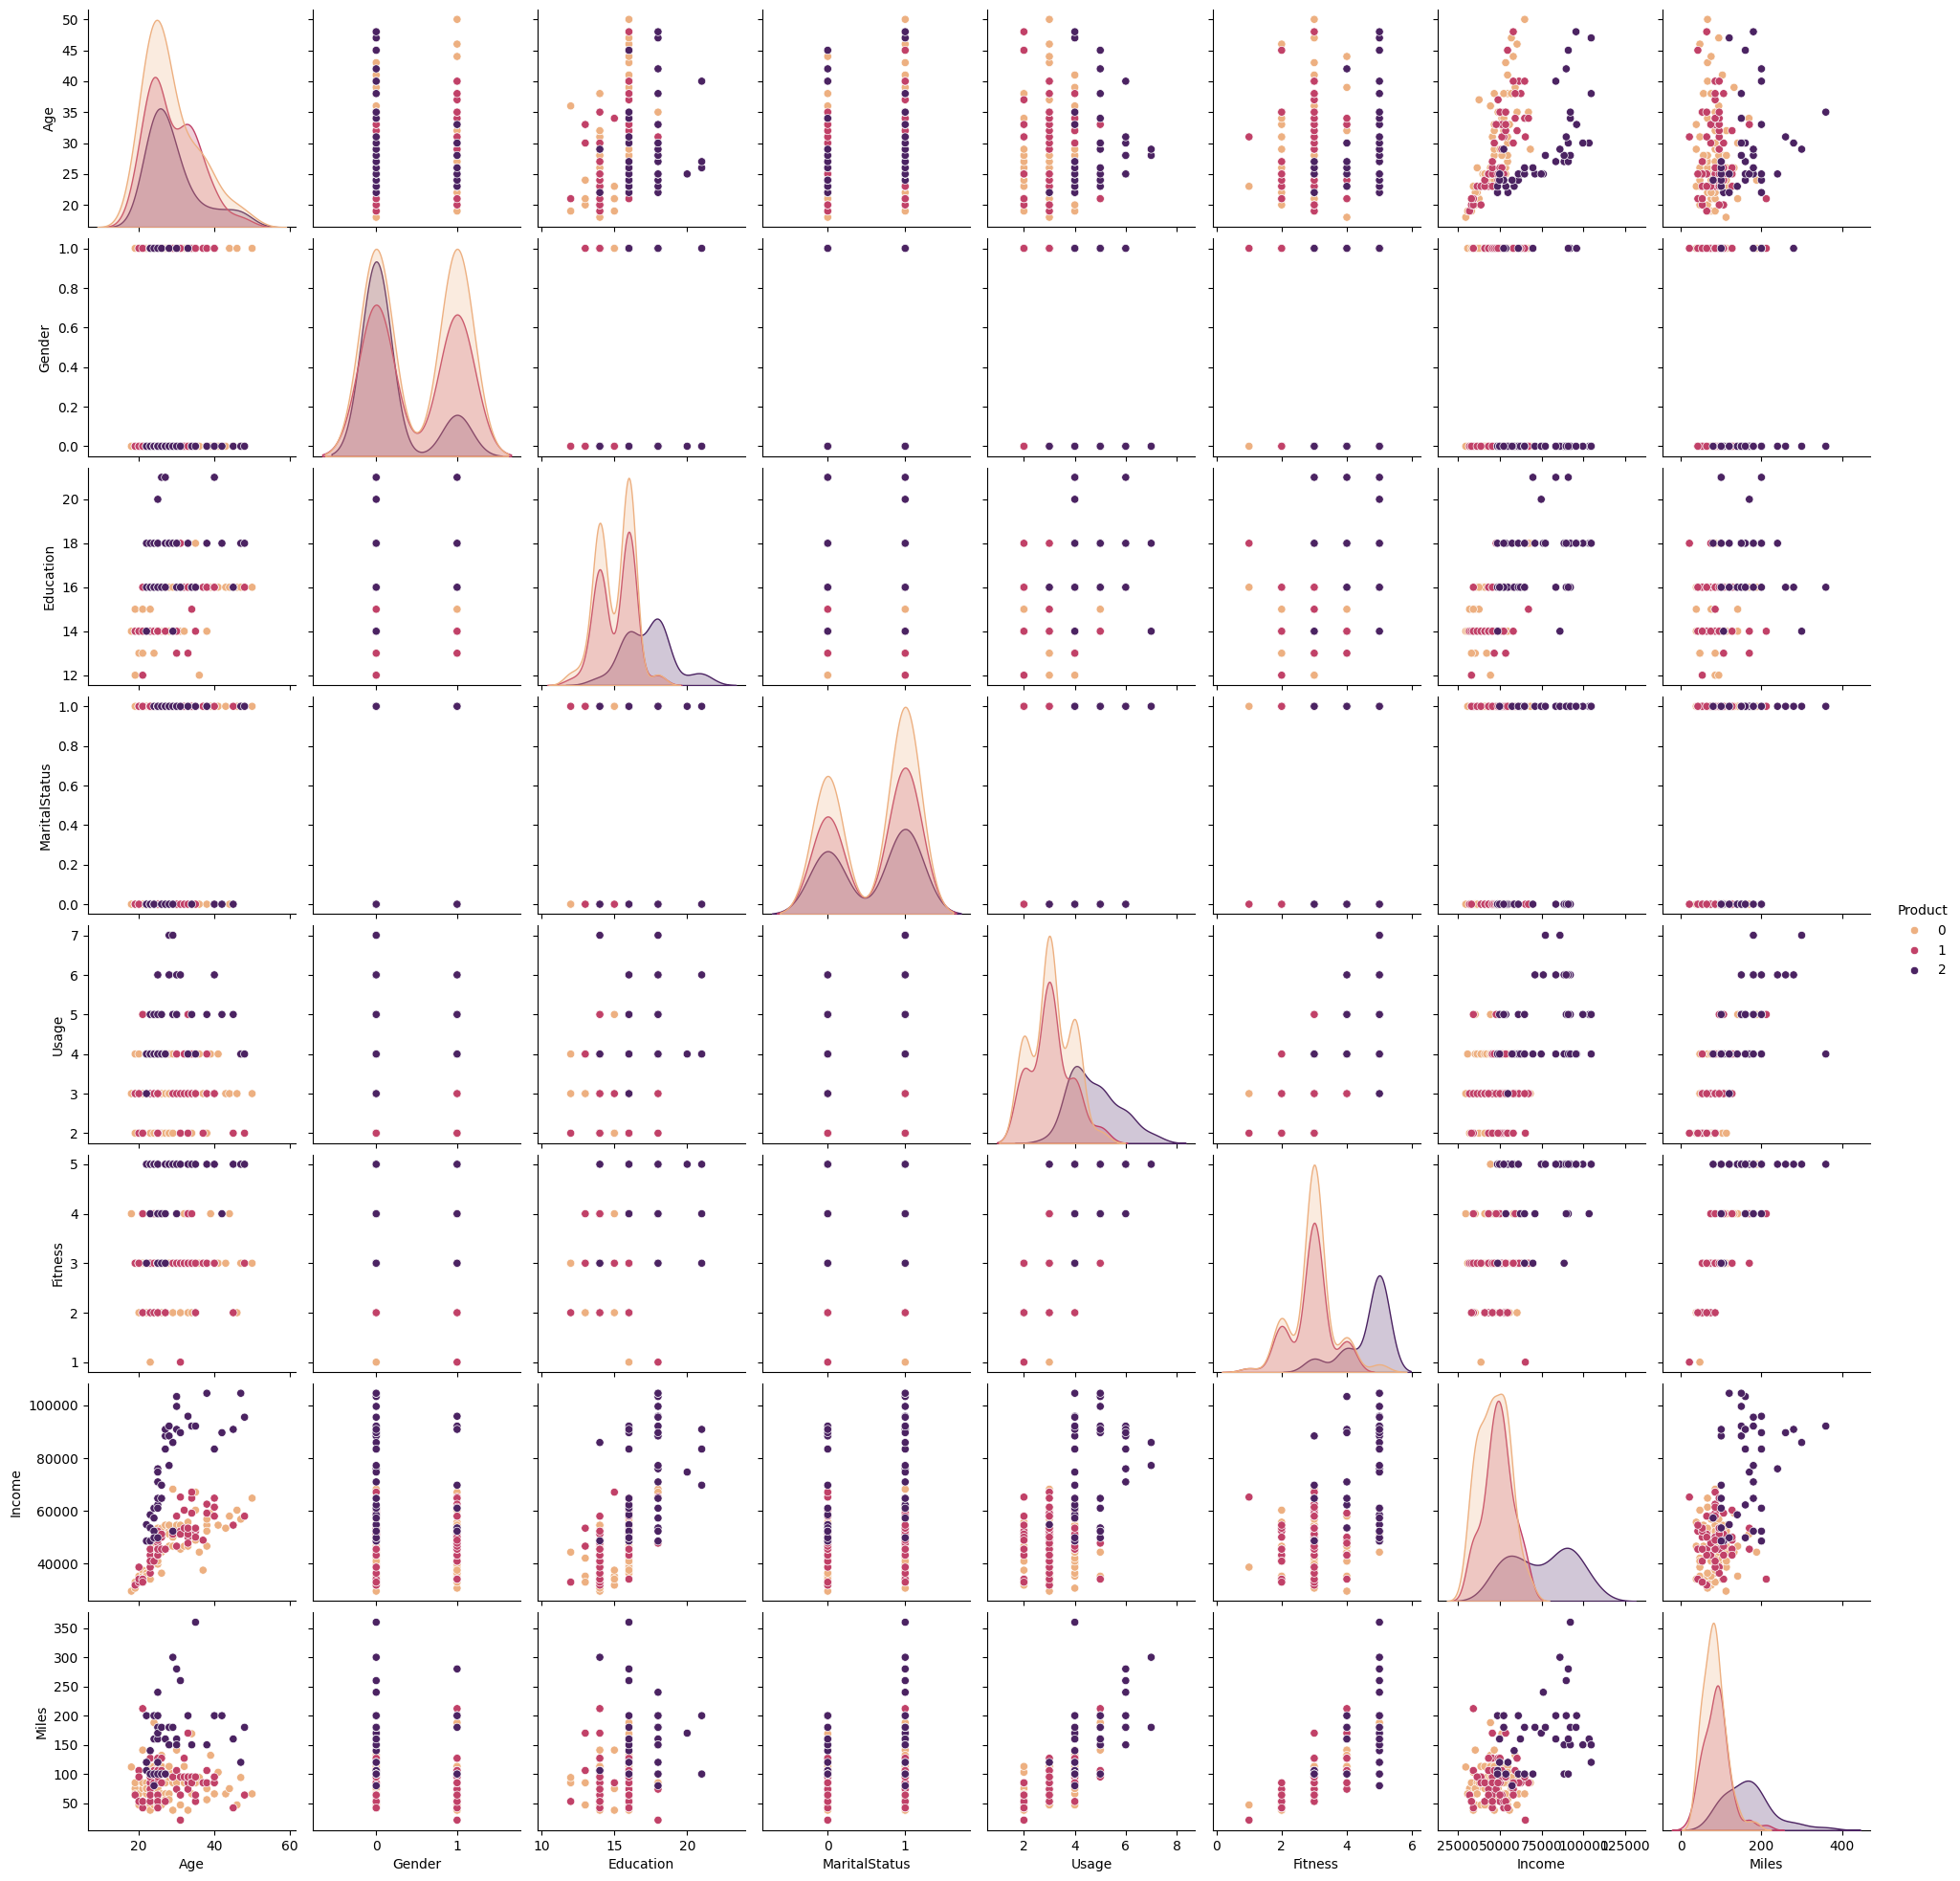

In [25]:
plt.figure(figsize=(15,10))
sns.pairplot(df_copy, hue ='Product', palette= 'flare')



*  Age and education are strongly correlated with income.
*  Usage is highly correlated with fitness and miles covered.
*  Gender shows no significant correlation with other parameters, indicating minimal impact on purchasing behavior.


*  Income strongly correlates with product choice and education, and moderately with age, usage, fitness, and miles.
*   Product preference is influenced by income, education, fitness, usage, and miles.
*   Advanced treadmill models are associated with higher usage, greater mileage, and improved fitness levels.



















**Computing Probability**

In [26]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [27]:
joint_prob_G = pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize=True)

conditional_prob_G = joint_prob_G.loc[joint_prob_G.index != 'All', joint_prob_G.columns != 'All']

conditional_prob_G = conditional_prob_G.div(conditional_prob_G.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product | Gender)):")
print(conditional_prob_G)


Conditional Probability Table (P(Product | Gender)):
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


1.  **Marginal Probabilities**

* 42.2% of treadmill buyers are female, 57.8% are male.
* KP281 is the most popular treadmill overall (44.4%).

2.   **Joint Probabilities**

* 22.2% of all buyers are females who purchased KP281.
* 18.3% of all buyers are males who purchased KP781.

3.   **Conditional Probabilities**


*   Among females, 52.6% choose KP281, 38.2% KP481, 9.2% KP781
*   Among males, 38.5% choose KP281, 29.8% KP481, 31.7% KP781.









In [28]:
bins = [0,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


In [29]:
# Probability of Age with respect to Product purchased.

pd.crosstab(index=df['Age_Bins'],columns=df['Product'],margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Age_Bins,,,,
<20,0.033333,0.022222,0.000000,0.055556
20-25,0.155556,0.133333,0.094444,0.383333
25-30,0.116667,0.038889,0.072222,0.227778
30-35,0.061111,0.094444,0.022222,0.177778
35-40,0.044444,0.033333,0.011111,0.088889
40+,0.033333,0.011111,0.022222,0.066667
All,0.444444,0.333333,0.222222,1.000000


In [30]:
joint_prob_A = pd.crosstab(index=df['Age_Bins'],columns=df['Product'],margins=True, normalize=True)

conditional_prob_A = joint_prob_A.loc[joint_prob_A.index != 'All', joint_prob_A.columns != 'All']

conditional_prob_A = conditional_prob_A.div(conditional_prob_A.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product | Age)):")
print(conditional_prob_A)

Conditional Probability Table (P(Product | Age)):
Product      KP281     KP481     KP781
Age_Bins                              
<20       0.600000  0.400000  0.000000
20-25     0.405797  0.347826  0.246377
25-30     0.512195  0.170732  0.317073
30-35     0.343750  0.531250  0.125000
35-40     0.500000  0.375000  0.125000
40+       0.500000  0.166667  0.333333


1.  **Marginal Probabilities**

* The age group 20-25 has the highest probability of purchasing a treadmill (38.3%), followed by 25-30 (22.8%).
* The age group < 20 has the lowest probability at about 5.55%.

2.   **Joint Probabilities**

* KP281 purchases are concentrated in the 20-25 age group, followed by 25-30.
* KP781 is mostly purchased by buyers aged 20-30, with very few in other groups.

3.   **Conditional Probabilities**


*   Given age < 20, the probability of purchasing KP781 is 0.
*   Given age 30-35, KP481 is the most popular (53.1%).

INCOME

In [31]:
bins = [0,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_Bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


In [32]:
pd.crosstab(index=df['Income_Bins'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Income_Bins,,,,
<35000,0.044444,0.033333,0.000000,0.077778
35000-45000,0.144444,0.050000,0.000000,0.194444
45000-50000,0.077778,0.083333,0.027778,0.188889
50000-60000,0.144444,0.127778,0.033333,0.305556
60000-70000,0.033333,0.038889,0.033333,0.105556
70000-90000,0.000000,0.000000,0.061111,0.061111
90000+,0.000000,0.000000,0.066667,0.066667
All,0.444444,0.333333,0.222222,1.000000


In [33]:
joint_prob_I = pd.crosstab(index=df['Income_Bins'],columns=df['Product'],margins=True,normalize=True)

conditional_prob_I = joint_prob_I.drop(index='All', columns='All')

conditional_prob_I = conditional_prob_I.div(conditional_prob_I.sum(axis=1), axis=0)



1.  **Marginal Probabilities**

* The income range 50,000-60,000 has the highest probability of purchasing a treadmill (30.56%), followed by 35,000-45,000 (19.44%).
* The income group < 35,000 has the lowest probability at about 7.78%.

2.   **Joint Probabilities**

* KP281 is mainly purchased by buyers with incomes 35,000-45,000 and 50,000-60,000.
* KP481 is mostly purchased by buyers in the 50000-60000 income range.
*   KP781 is mostly purchased by buyers in the 70,000-90,000 and 90,000+ income groups.



3.   **Conditional Probabilities**


*   Given income < 35,000, the probability of purchasing KP781 is 0.KP281 dominates (57.1%).
*  Given income 70,000+, KP781 is exclusively purchased.




In [34]:
bins = [0,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_Bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins,Mile_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


In [35]:
pd.crosstab(index=df['Mile_Bins'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Mile_Bins,,,,
<50,0.066667,0.027778,0.000000,0.094444
50-100,0.277778,0.216667,0.044444,0.538889
100-150,0.088889,0.072222,0.050000,0.211111
150+,0.011111,0.016667,0.127778,0.155556
All,0.444444,0.333333,0.222222,1.000000


In [36]:
joint_prob_M = pd.crosstab(index=df['Mile_Bins'],columns=df['Product'],margins=True,normalize=True)

conditional_prob_M = joint_prob_M.drop(index='All', columns='All')

conditional_prob_M = conditional_prob_M.div(conditional_prob_M.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product | Miles)):")
print(conditional_prob_M)

Conditional Probability Table (P(Product | Miles)):
Product       KP281     KP481     KP781
Mile_Bins                              
<50        0.705882  0.294118  0.000000
50-100     0.515464  0.402062  0.082474
100-150    0.421053  0.342105  0.236842
150+       0.071429  0.107143  0.821429


1.  **Marginal Probabilities**

* Most treadmill buyers cover 50-100 miles per week (53.9%), with the next largest group running 100-150 miles per week (21.1%).
* The treadmill purchase probability is lowest for the < 50 miles/week group, at 9.44%.

2.   **Joint Probabilities**

* KP281 purchases are concentrated in the 50-100 miles/week range.
* KP281 and KP481 treadmill users mostly run 50-100 miles per week,

3.   **Conditional Probabilities**


*   Given income < 35,000, the probability of purchasing KP781 is 0.KP281 dominates (57.1%).
*  Given income 70,000+, KP781 is exclusively purchased.

In [37]:
# Probability of Education with respect to Product purchased.

pd.crosstab(index=df['Education'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Education,,,,
12,0.011111,0.005556,0.000000,0.016667
13,0.016667,0.011111,0.000000,0.027778
14,0.166667,0.127778,0.011111,0.305556
15,0.022222,0.005556,0.000000,0.027778
16,0.216667,0.172222,0.083333,0.472222
18,0.011111,0.011111,0.105556,0.127778
20,0.000000,0.000000,0.005556,0.005556
21,0.000000,0.000000,0.016667,0.016667
All,0.444444,0.333333,0.222222,1.000000


In [38]:
joint_prob_E = pd.crosstab(index=df['Education'],columns=df['Product'],margins=True,normalize=True)

conditional_prob_E = joint_prob_E.drop(index='All', columns='All')

conditional_prob_E = conditional_prob_E.div(conditional_prob_E.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product | Education)):")
print(conditional_prob_E)

Conditional Probability Table (P(Product | Education)):
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.036364
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.086957  0.086957  0.826087
20         0.000000  0.000000  1.000000
21         0.000000  0.000000  1.000000


1.  **Marginal Probabilities**

* The majority of treadmill buyers have 16 years of education (47.2%), followed by 14 years (30.6%).
* Buyers with 20 and 21 years of education have the lowest probability of purchase (0.56% and 1.67%, respectively).

2.   **Joint Probabilities**

* KP281 and KP481 are predominantly purchased by buyers with 14-16 years of education.
*   KP781 is mainly purchased by buyers with 16 or more years of education, with strong adoption in the 18-21 years bracket, reflecting a preference for premium products among highly educated users.


3.   **Conditional Probabilities**

* For 18 years, KP781 dominates (~82.6%), while KP281 and KP481 are seldom chosen.
*  For 20-21 years, KP781 is exclusively purchased.

In [39]:
# Probability of Fitness with respect to Product purchased.

pd.crosstab(index=df['Fitness'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
All,0.444444,0.333333,0.222222,1.000000


In [40]:
joint_prob_F = pd.crosstab(index=df['Fitness'],columns=df['Product'],margins=True,normalize=True)

conditional_prob_F = joint_prob_F.drop(index='All', columns='All')

conditional_prob_F = conditional_prob_F.div(conditional_prob_F.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product | Fitness )):")
print(conditional_prob_F)

Conditional Probability Table (P(Product | Fitness )):
Product     KP281     KP481     KP781
Fitness                              
1        0.500000  0.500000  0.000000
2        0.538462  0.461538  0.000000
3        0.556701  0.402062  0.041237
4        0.375000  0.333333  0.291667
5        0.064516  0.000000  0.935484


1.  **Marginal Probabilities**

* Most treadmill buyers rate their fitness as 3 (53.9%), followed by 5 (17.2%) and 2 (14.4%).
* Very few buyers are in the 1 (lowest fitness) category (1.11%).

2.   **Joint Probabilities**

* KP281 and KP481 purchases are mostly concentrated among buyers with fitness ratings 2-3.
* KP781 is primarily purchased by buyers with the highest fitness rating (5), with some adoption in rating 4.


3.   **Conditional Probabilities**

* Given fitness 5, KP781 dominates (~93.5%), while KP281 and KP481 are rarely chosen.
*  Given fitness 3, KP281 remains the most common choice (55.7%), while KP781 adoption is low (~4.1%).

In [41]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize= True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


In [42]:
joint_prob_MS = pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize=True)

conditional_prob_MS = joint_prob_MS.drop(index='All', columns='All')

conditional_prob_MS = conditional_prob_MS.div(conditional_prob_MS.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product |MaritalStatus)):")
print(conditional_prob_MS)

Conditional Probability Table (P(Product |MaritalStatus)):
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


1.  **Marginal Probabilities**

* Partnered buyers account for ~59.4% of all treadmill purchases.
* Single buyers make up ~40.6% of treadmill purchases.

2.   **Joint Probabilities**

* KP281 is the most purchased product among both partnered (26.7%) and single (17.8%) buyers.
* KP481 purchases are moderate across both groups, slightly higher among partnered (20%) than single (13.3%).
* KP781 slightly higher among partnered buyers (12.8%) compared to singles (9.4%).

3.   **Conditional Probabilities**

* Given a buyer is partnered, KP281 is most likely purchased (44.9%), followed by KP481 (33.6%) and KP781 (21.5%).
*  Given a buyer is single, KP281 remains most popular (43.8%), with KP481 at 32.9% and KP781 at 23.3%.

In [43]:
pd.crosstab(index=df['Usage'],columns=df['Product'],margins=True,normalize= True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.105556,0.077778,0.000000,0.183333
3,0.205556,0.172222,0.005556,0.383333
4,0.122222,0.066667,0.100000,0.288889
5,0.011111,0.016667,0.066667,0.094444
6,0.000000,0.000000,0.038889,0.038889
7,0.000000,0.000000,0.011111,0.011111
All,0.444444,0.333333,0.222222,1.000000


In [44]:
joint_prob_U = pd.crosstab(index=df['Usage'],columns=df['Product'],margins=True,normalize= True)

conditional_prob_U = joint_prob_U.drop(index='All', columns='All')

conditional_prob_U = conditional_prob_U.div(conditional_prob_U.sum(axis=1), axis=0)

print("Conditional Probability Table (P(Product |MaritalStatus)):")
print(conditional_prob_U)

Conditional Probability Table (P(Product |MaritalStatus)):
Product     KP281     KP481     KP781
Usage                                
2        0.575758  0.424242  0.000000
3        0.536232  0.449275  0.014493
4        0.423077  0.230769  0.346154
5        0.117647  0.176471  0.705882
6        0.000000  0.000000  1.000000
7        0.000000  0.000000  1.000000


1.  **Marginal Probabilities**

* Most treadmill buyers use the treadmill 3 times per week (38.3%)
* Very few buyers use it 6 or 7 times/week (3.9% and 1.1%), representing a small “power user” segment.

2.   **Joint Probabilities**

* KP281 and KP481 are predominantly purchased by buyers with 2–3 times/week usage.
* KP781 purchases increase with higher usage: buyers using the treadmill 5+ times/week are mostly KP781 users.

3.   **Conditional Probabilities**

* Given usage 2–3 times/week, KP281 dominates (53–57%), KP481 is moderately chosen (42–45%), and KP781 is rarely selected (0–1.5%).
*  For 5–7 times/week, KP781 is the primary choice (70.6–100%), while KP281 and KP481 are rarely chosen.

# **Customer Profiling**

**1. KP281 – Entry-Level Treadmill**

**Target Demographics**
*   Age: 20–30 years, mainly 20–25.
*   Gender: Slightly more males, but females also significant.
*   Marital Status: Both single and partnered.
*   Education: 14–16 years (college graduates or early career professionals).
*   Income: $30K–50K (mid-income buyers).

**Behavioral Characteristics**

*   Usage: 2–3 times/week (moderate use).
*   Miles/Week: 50–100 miles (casual to moderately active users).
*   Fitness Rating: ~3 (average self-assessed fitness).

**Insights**
*  Most purchased treadmill in the dataset.
*  Appeals to mass-market users seeking affordability and basic features.
*   Ideal for promotions emphasizing value, reliability, and ease of use.








**2. KP481 – Mid-Tier Treadmill**

**Target Demographics**
*   Age: 25–35 years, slightly older than KP281 buyers.
*   Gender: Predominantly male, but widely adopted by females.
*   Marital Status: Mostly partnered, with some singles.
*   Education: 14–16 years
*   Income: $40K–60K (upper-mid income).

**Behavioral Characteristics**

*   Usage: 3–4 times/week (consistent usage).
*   Miles/Week: 100–150 miles (moderate to high activity).
*   Fitness Rating: 3–4 (moderately fit).

**Insights**
*  Suited for active, professional users who want more features than entry-level models.
*  Messaging should emphasize performance, reliability, and moderate advanced features.
* Opportunities for corporate wellness programs and home gym integration.

**3. KP781 – Premium Treadmill**

**Target Demographics**
*   Age: 25–40 years, mostly young professionals and mature users.
*   Gender: Predominantly male.
*   Marital Status: Mostly partnered.
*   Education: 16+ years; many with advanced degrees.
*   Income: $70K+ (high-income buyers).

**Behavioral Characteristics**

*   Usage: 5+ times/week (power users).
*   Miles/Week: 50+ miles (highly active).
*   Fitness Rating: 4–5 (very fit).

**Insights**
*  Premium treadmill for high-income, performance-focused users.
*  Messaging should highlight advanced technology, durability, and professional features.
* Ideal for premium home gyms, dedicated athletes, and exclusive promotions.

# Modelling

# Predictive Modeling Framework

### Business Objective
The goal is to build a classification engine that predicts customer product choice (KP281 vs. KP481 vs. KP781) based on demographic features.

### Model Selection Strategy
For this classification task, we have selected the **Random Forest Classifier** as our primary algorithm. We are prioritizing this for the following statistical reasons based on our EDA:

1.  **Non-Linearity:** Our EDA showed that relationships between variables are not strictly linear. For example, *Income* has a high variance for KP781 but overlaps significantly for lower tiers. Random Forest handles these non-linear decision boundaries effectively.
2.  **Multicollinearity Handling:** Variables like *Usage*, *Fitness*, and *Miles* are highly correlated. Random Forest is robust to multicollinearity, whereas linear models would require extensive feature engineering (VIF reduction) to avoid unstable coefficients.



In [45]:
# Prepare Data
df_model = df.copy()
cols_to_drop = ['Age_Bins', 'Income_Bins', 'Mile_Bins', 'Mile Bins']
df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])

In [46]:
# Encoding Categorical Variables (Gender, MaritalStatus)
# 'drop_first=True' is crucial in statistics to avoid Multicollinearity (Dummy Variable Trap)
df_model = pd.get_dummies(df_model, columns=['Gender', 'MaritalStatus'], drop_first=True)

In [47]:
# Define Features (X) and Target (y)
X = df_model.drop('Product', axis=1)
y = df_model['Product']

In [48]:

# 2. Split the Data
# 80% for training the "Brain", 20% for testing it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:


# 1. Train the Random Forest Model
# n_estimators=100 means we are building 100 small decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Make Predictions
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluate Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 63.89%

Classification Report:
               precision    recall  f1-score   support

       KP281       0.65      0.72      0.68        18
       KP481       0.25      0.22      0.24         9
       KP781       1.00      0.89      0.94         9

    accuracy                           0.64        36
   macro avg       0.63      0.61      0.62        36
weighted avg       0.64      0.64      0.64        36



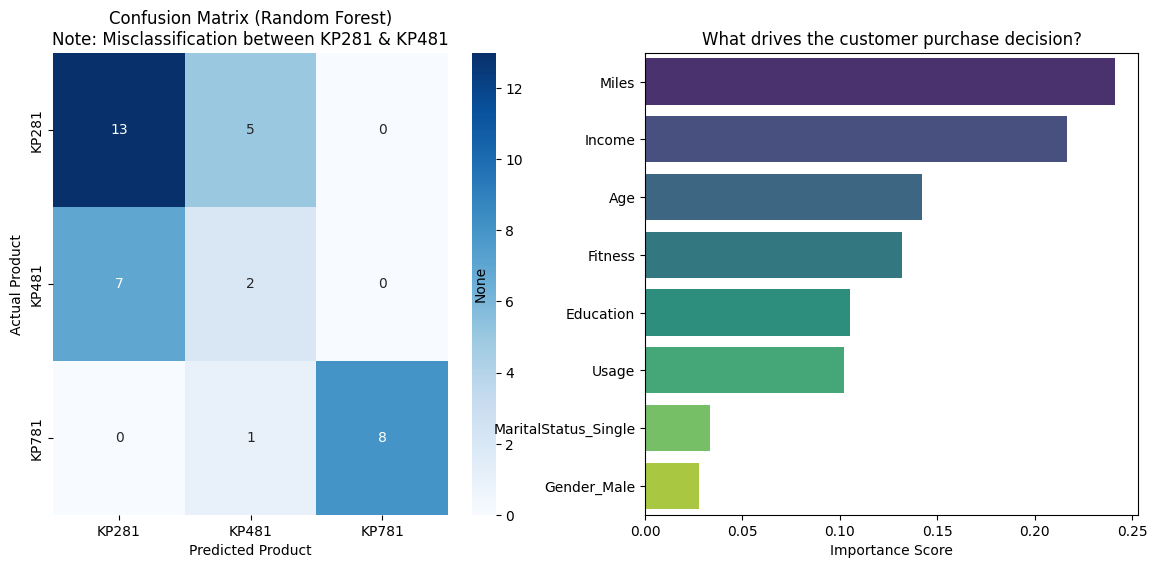

In [50]:
# ----------------------------------------------------------------
# 3. Diagnostic Analysis: Performance Bottleneck Investigation
# ----------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Visualization 1: Confusion Matrix
# Identifies specific classes where the model struggles to differentiate
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix (Random Forest)\nNote: Misclassification between KP281 & KP481')
plt.ylabel('Actual Product')
plt.xlabel('Predicted Product')

# Visualization 2: Feature Importance
# Identifies the primary drivers of customer segmentation
plt.subplot(1, 2, 2)
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances.importance, y=feature_importances.index, hue=feature_importances.index, palette='viridis', legend=False)
plt.title('What drives the customer purchase decision?')
plt.xlabel('Importance Score')
plt.show()

The Random Forest classifier achieved an overall accuracy of 64% on the test dataset when predicting the three product categories (KP281, KP481, KP781).
A closer inspection of the classification report revealed that the model performed strongly in identifying KP781 (Premium) customers, while most misclassifications occurred between KP281 and KP481.

This error pattern suggests that the model was able to capture meaningful structure in the data, but struggled to distinguish between KP281 and KP481. Rather than assuming model underperformance, this behavior motivated a deeper investigation into whether the observed confusion reflected similarities in the underlying customer demographics.

### Statistical Validation: Investigating the Overlap

**Hypothesis Testing Strategy**
Exploratory Data Analysis (EDA) indicated that KP281 and KP481 customers exhibit highly similar profiles, while KP781 appears distinct. To formally assess if these differences are statistically meaningful, we focused on **Income** as the primary differentiator.

**Methodology Selection:**
We initially considered a **One-Way ANOVA** to compare means. However, ANOVA requires the data to meet two strict assumptions:
1.  **Normality:** The data should follow a bell curve (Shapiro-Wilk Test).
2.  **Homogeneity of Variance:** The spread of data should be equal across groups (Levene's Test).

**The Pivot:**
If these assumptions are violated, we must switch to the **Kruskal-Wallis H Test**, a robust non-parametric alternative that does not assume a normal distribution.

In [63]:
# ----------------------------------------------------------------
# 📊 Statistical Validation: Assumption Checks & Robust Testing
# ----------------------------------------------------------------


# 1. Prepare Data Groups
group_281 = df[df['Product'] == 'KP281']['Income']
group_481 = df[df['Product'] == 'KP481']['Income']
group_781 = df[df['Product'] == 'KP781']['Income']

# ----------------------------------------------------------------
# Step 1: Check Assumptions (The "Gatekeeper")
# ----------------------------------------------------------------
print("1. Assumption Check:")

# A. Normality (Shapiro-Wilk)
# H0: Data is normally distributed (p > 0.05)
print(f"   - Normality (KP781): p={shapiro(group_781)[1]:.4f}", end=" ")
if shapiro(group_781)[1] < 0.05: print("Assumption Violated")
else: print("Assumption Passed")

# B. Homogeneity of Variance (Levene's Test)
# H0: Variances are equal (p > 0.05)
lev_stat, lev_p = levene(group_281, group_481, group_781)
print(f"   - Equal Variance:    p={lev_p:.4e}", end=" ")
if lev_p < 0.05: print("Assumption Violated")
else: print("Assumption Passed")

# ----------------------------------------------------------------
# Step 2: Run the Robust Test (Kruskal-Wallis)
# ----------------------------------------------------------------
if lev_p < 0.05:
    print("\n Assumptions Failed -> Switching to Kruskal-Wallis H Test (Non-Parametric)")
    k_stat, k_p = kruskal(group_281, group_481, group_781)

    print(f"   - Kruskal-Wallis p-value: {k_p:.4e}")

    if k_p < 0.05:
        print("\n   Conclusion: Significant difference found overall. Running Post-Hoc...")
        print("-" * 65)
        print("   Post-Hoc Analysis: Mann-Whitney U Test (Pairwise)")
        print("-" * 65)

        # Step 3: Post-Hoc Pairwise Comparisons
        # Bonferroni Correction: Alpha = 0.05 / 3 = 0.0167
        alpha_corrected = 0.05 / 3
        pairs = [('KP281', 'KP481', group_281, group_481),
                 ('KP281', 'KP781', group_281, group_781),
                 ('KP481', 'KP781', group_481, group_781)]

        for name1, name2, data1, data2 in pairs:
            u_stat, u_p = mannwhitneyu(data1, data2, alternative='two-sided')
            significance = "Significant " if u_p < alpha_corrected else "Not Significant (Overlap Confirmed)"
            print(f"   {name1} vs {name2} | p-value: {u_p:.4e} | {significance}")

else:
    print("\n Assumptions Passed -> Running One-Way ANOVA")
    f_stat, p_value = f_oneway(group_281, group_481, group_781)
    print(f"ANOVA F-statistic: {f_stat:.2f}")
    print(f"ANOVA p-value: {p_value:.4e}") # Expected to be very small (< 0.05)

1. Assumption Check:
   - Normality (KP781): p=0.0046 Assumption Violated
   - Equal Variance:    p=1.4384e-14 Assumption Violated

 Assumptions Failed -> Switching to Kruskal-Wallis H Test (Non-Parametric)
   - Kruskal-Wallis p-value: 4.5624e-14

   Conclusion: Significant difference found overall. Running Post-Hoc...
-----------------------------------------------------------------
   Post-Hoc Analysis: Mann-Whitney U Test (Pairwise)
-----------------------------------------------------------------
   KP281 vs KP481 | p-value: 1.4118e-01 | Not Significant (Overlap Confirmed)
   KP281 vs KP781 | p-value: 2.0836e-13 | Significant 
   KP481 vs KP781 | p-value: 6.5708e-11 | Significant 


Based on EDA, model behavior, and statistical testing, KP281 and KP481 exhibit substantial demographic overlap and no statistically significant difference in mean income. Treating them as separate classes introduces label ambiguity and limits predictive performance. Therefore, these two categories are merged into a single Mass Market segment, while KP781 is retained as a distinct Premium segment.

With this refined segmentation, a new Random Forest classifier is trained to predict Mass Market vs Premium customers.

In [53]:
# 1. Re-Engineering the Target Variable
# We map KP281 and KP481 to "Mass Market" to test the new hypothesis
df_model['Product_Category'] = df_model['Product'].map({
    'KP281': 'Mass Market',
    'KP481': 'Mass Market',
    'KP781': 'Premium'
})

# 2. Split Data for Binary Classification
y_binary = df_model['Product_Category']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 3. Train the Reframed Model
rf_binary = RandomForestClassifier(n_estimators=100, random_state=42)
rf_binary.fit(X_train_b, y_train_b)

# 4. Evaluate Performance
y_pred_binary = rf_binary.predict(X_test_b)
print(f"Binary Segment Accuracy: {accuracy_score(y_test_b, y_pred_binary):.2%}")
print("\nClassification Report:\n", classification_report(y_test_b, y_pred_binary))

Binary Segment Accuracy: 94.44%

Classification Report:
               precision    recall  f1-score   support

 Mass Market       0.93      1.00      0.96        27
     Premium       1.00      0.78      0.88         9

    accuracy                           0.94        36
   macro avg       0.97      0.89      0.92        36
weighted avg       0.95      0.94      0.94        36



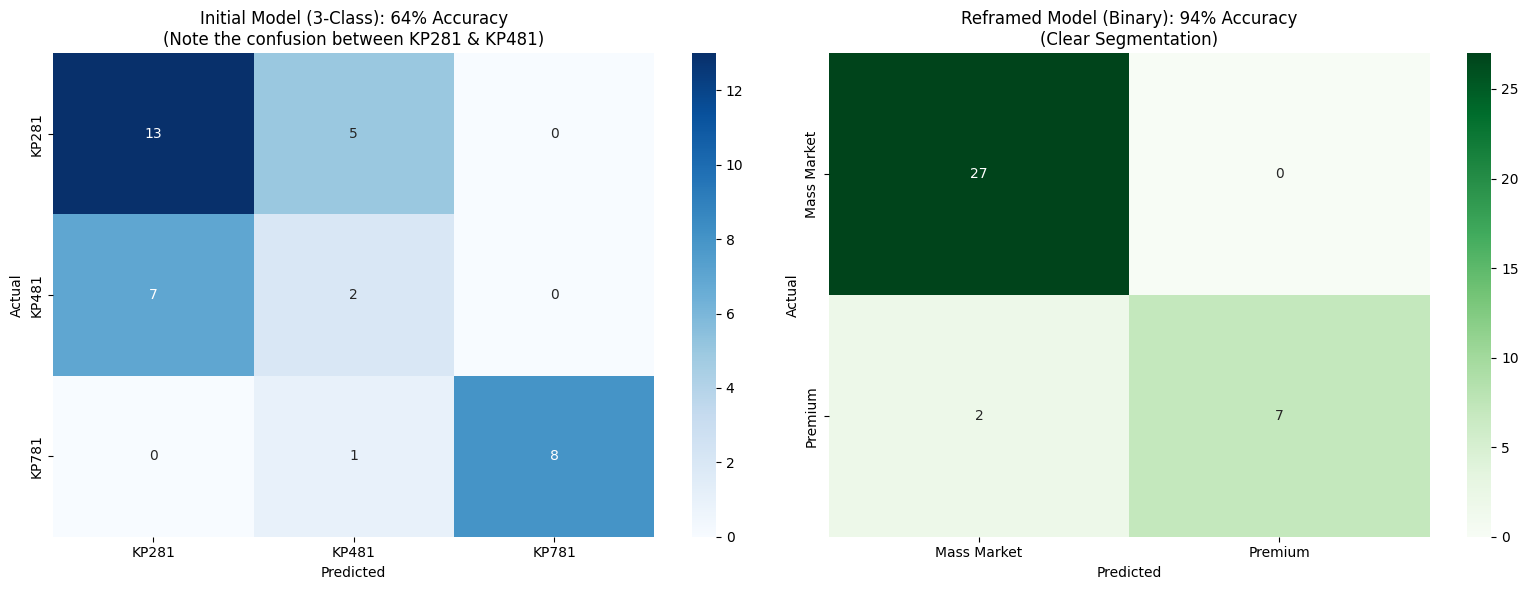

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: The "Confused" 3-Way Model (From Phase 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['KP281', 'KP481', 'KP781'],
            yticklabels=['KP281', 'KP481', 'KP781'], ax=ax[0])
ax[0].set_title('Initial Model (3-Class): 64% Accuracy\n(Note the confusion between KP281 & KP481)')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

# Plot 2: The "Optimized" Binary Model (From Phase 2)
sns.heatmap(confusion_matrix(y_test_b, y_pred_binary), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Mass Market', 'Premium'],
            yticklabels=['Mass Market', 'Premium'], ax=ax[1])
ax[1].set_title('Reframed Model (Binary): 94% Accuracy\n(Clear Segmentation)')
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

After consolidating KP281 and KP481 into a single Mass Market segment, the Random Forest classifier achieved an accuracy of 94.44%, a substantial improvement over the original three-class model.

The model demonstrates strong predictive performance for both segments, with perfect recall for Mass Market customers and high precision for Premium customers. This improvement indicates that the revised segmentation better reflects the underlying customer structure and reduces class ambiguity.

These results confirm that reformulating the problem as a Mass Market vs Premium classification task leads to a more reliable and actionable model.

# Business Recommendations

Based on the statistical analysis and predictive modeling, we propose the following data-driven strategy for Aerofit:

### 1. Consolidate the "Mass Market" Funnel
* **Insight:** The 3-way classification model proved that KP281 (Entry) and KP481 (Mid-Tier) customers are demographically indistinguishable (Income: $30k-$60k, Usage: 3x/week).
* **Action:** Stop running separate customer acquisition campaigns for these two products. Merge them into a single **"General Fitness"** marketing funnel.
* **Benefit:** This concentrates ad spend on a wider audience and reduces marketing fragmentation.

### 2. Implement a "Usage-Based" Upsell Strategy
* **Insight:** Since demographics cannot predict the choice between KP281 and KP481, the decision is likely driven by **in-store sales interaction** or specific feature needs (e.g., incline, running surface).
* **Action:** Train sales staff to start *all* Mass Market customers on the KP281. Then, use specific questions ("Do you plan to run more than 100 miles/month?") to upsell to the KP481 based on durability needs rather than income.

### 3. "Premium" Targeting is Pure Gold
* **Insight:** The model identifies KP781 customers with Perfect precision for Premium customers in the test set. These users are statistically distinct (Income > $70k, Fitness Rating > 4, Miles > 120).
* **Action:** Create an exclusive, high-end campaign targeting **High-Income Professionals** and **Dedicated Runners**.
* **Channel Strategy:** Focus on LinkedIn (professionals) and Strava/Fitness Communities (runners), avoiding broad-appeal platforms where Mass Market users congregate.
